# Binomial Option Pricing Model
A Binomial Tree is a diagram that represents the different possible paths that the price of a stock might take over the life of an option. The underlying assumption is that the stock follows a *random walk*. In each time step, there is a probability of the stock moving up or down by a certain percentage amount.

### One-Step Binomial Model
A Binomial tree follows a no-arbitrage assumption for valuing options. Consider a stock with price $S_{0}$ and an option of that stock with current price $f$. We suppose that the option lasts for time $T$ and that during the life of the option the stock price can either move up from $S_{0}$ to $S_{0}u$, where $u > 1$, or down to $S_{0}d$, where $d < 1$.

The percentage increase in the stock price when there is upward movement is $u - 1$ and the percentage decrease in the stock when there is downward movement is $1 - d$ (For example: if the percentage increase or decrease is $10$% then $u = 1.1$ and $d = 0.9$). 

If the stock price moves up to $S_{0}u$, we suppose the payoff from the option is $f_{u}$ and if the stock price moves down to $S_{0}d$, we suppose the payoff from the option is $f_{d}$.

Now, imagine a portfolio consisting of a long position in $\Delta$ shares and a short position in one option. We can calculate the value of $\Delta$ that makes the portfolio riskless.

If there is an up movement in the stock price , the value of the portfolio at the end of the life of the option is $S_{0}u\Delta - f_{u}$. If there is a down movement in the stock price, the value becomes $S_{0}d\Delta - f_{d}$. The two are equal when $S_{0}u\Delta - f_{u} = S_{0}d\Delta - f_{d}$. Solving for $\Delta$ we get $\Delta = \frac{f_{u} - f_{d}}{S_{0}u - S_{0}d}$.

In this case, the porfolio is riskless and for there to be no-arbitrage opportunities, it must earn the risk-free interest rate. Denoting the risk-free interest rate by $r$, the present value of the portfolio is $(S_{0}u\Delta - f_{u})e^{-rT}$. The cost of setting up the portfolio is $S_{0} - f$.

It follows that $S_{0} - f = (S_{0}u\Delta - f_{u})e^{-rT}$ or: $f = S_{0}\Delta(1 - ue^{-rT}) + f_{u}e^{-rT}$. 

Substituting for $\Delta$, we obtain: 
$f = S_{0}(\frac{f_{u} - f_{d}}{S_{0}u - S_{0}d})(1 - ue^{-rT}) + f_{u}e^{-rT}$

or

$f = e^{-rT}[pf_{u} + (1 - p)f_{d}]$ **(1.0)**

where $p = \frac{e^{rT} - d}{u - d}$ 

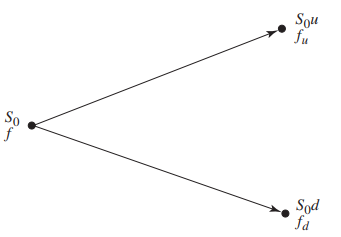

### One-Step Binomial Tree

In [5]:
import numpy as np

In [6]:
def one_step_binomial_tree(S0, K, T, r, u, d): #call example
    # Constants
    p = (np.exp(r*T) - d)/(u-d)
    v = np.exp(-r*T) # continuous discount rate
    
    # Calculate future stock prices
    S = [S0*u, S0*d]
    
    # Calculate option values
    #                  fu                fd
    opt_val = [max(0, S[0] - K), max(0, S[1] - K)]
    
    # Calculate option of our desired stock
    f = v*(p*opt_val[0] + (1-p)*opt_val[1])
    return f

one_step_binomial_tree(20, 21, 3/12, 0.04, 1.1, 0.9)

0.544775748128743

### Greater-Than-One Step Binomial Trees
From our derivation of the one-step binomial tree, we know we can obtain the price of an option from the prices of the options from the up and down trees with the equation $f = e^{-rT}[pf_{u} + (1 - p)f_{d}]$ (Example: $f_{u}$ can be found from $f_{uu}$ and $f_{ud}$). Since we always know the option prices of the final nodes of the tree, we can repeatedly apply our equation in order to determine the option price at the initial node of the tree. We also now have $\Delta t$ in place of $T$ as where $\Delta t = \frac{T}{N}$ where $N$ is the number of steps in our binomial tree.

Example: To find $f$ for a two-step binomial tree, we use our equation to first find $f_{u}$ and $f_{d}$, and then find $f$.

$f_{u} = e^{-r\Delta t}[pf_{uu} + (1 - p)f_{ud}]$

$f_{d} = e^{-r\Delta t}[pf_{ud} + (1 - p)f_{dd}]$

$f = e^{-r\Delta t}[pf_{u} + (1 - p)f_{d}]$

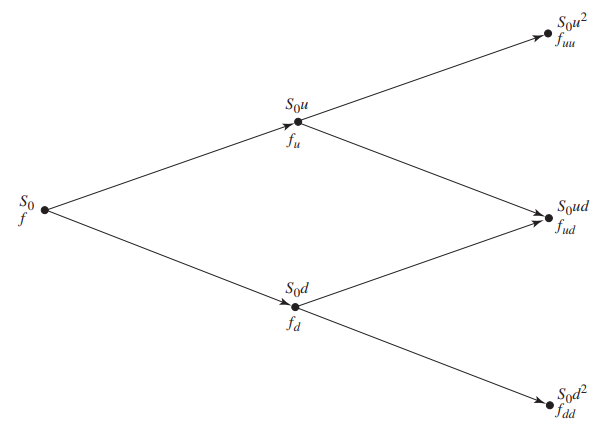

### Code for Binomial Tree (Call)

In [243]:
S0 = 20        # Inital Stock Price
K = 21         # Strike Price
T = 3/12       # Time to Maturity
r = 0.04       # annual risk-free rate
N = 2          # number of time steps
u = 1.1        # probability stock goes up
d = 0.9        # probability stock goes down

In [249]:
def binomial_tree_call(S0, K, T, r, N, u, d):
    # calculate constants
    delta_t = T/N
    p = (np.exp(r*delta_t) - d) / (u-d)
    disc_rate = np.exp(-r*delta_t)
    
    # initialize asset prices at maturity - Time step N
    S = np.zeros(N+1)
    for j in range(0, N+1):
        S[j] = S0*u**j * d**(N-j)
    
    # initialize option values at maturity
    C = np.zeros(N+1)
    for j in range(0, N+1):
        C[j] = max(0, S[j]-K)
    
    # step backwards through the tree
    for i in np.arange(N, 0, -1):
        for j in range(0, i):
            C[j] = disc_rate*(p*C[j+1] + (1-p)*C[j])
    
    return C[0]

# Test
binomial_tree_call(S0, K, T, r, N, u, d)

0.8734322231998347

### Put Option
We know that we can repeatedly apply our equation from **(1.0)** to price calls and the same can be done for puts aswell. We now take the max of $0$ or $K - S_{j}$.

Consider a 2 year European put with a risk-free rate of 5%, current stock price of \\$50, strike price of \\$52. Suppose that there are 2 time steps in 1 year, and each time step the stock price can go up 20% or down 20%.

In [288]:
def binomial_tree_put(S0, K, T, r, N, u, d):
    # calculate constants
    delta_t = T/N
    p = (np.exp(r*delta_t) - d) / (u-d)
    disc_rate = np.exp(-r*delta_t)
    
    # initialize asset prices at maturity - Time step N
    S = np.zeros(N+1)
    for j in range(0, N+1):
        S[j] = S0*u**j * d**(N-j)
    
    # initialize option values at maturity
    C = np.zeros(N+1)
    for j in range(0, N+1):
        C[j] = max(0, K - S[j])
    
    # step backwards through the tree
    for i in np.arange(N, 0, -1):
        for j in range(0, i):
            C[j] = disc_rate*(p*C[j+1] + (1-p)*C[j])
    
    return C[0]

# Test
binomial_tree_put(50, 52, 2, 0.05, 2, 1.2, 0.8)

4.1926542806038585

### Matching Volatility with $u$ and $d$

The three parameters needed to construct a binomial tree are $u$, $d$, and $p$. We know that $p$ must be chosen so that the expected return is the risk-free rate $r$ and that $p = \frac{e^{rT} - d}{u - d}$. The parameters $u$ and $d$ should be chosen to match volatility. The volatility of a stock, $\sigma$, is defined so that the standard deviation of its return in a short period of time $\Delta t$ is $\sigma \sqrt{\Delta t}$. Equivalently, the variance of the return in $\Delta t$ is $\sigma^{2} \Delta t$. Varience of a variable $X$ is defined as $E(X^{2}) - [E(X)]^{2}$, were $E$ is the expected value of $X$. During the time step of $\Delta t$, there is probability $p$ that the stock will have a return of $u - 1$ and a probability of $1 - p$ that it have a return of $d - 1$. It follow that the volatility is matched if:

$p(u - 1)^{2} + (1 - p)(d - 1)^{2} - [p(u - 1) + (1 - p)(d - 1)]^{2} = \sigma^{2} \Delta t$

where $E(X^{2}) = p(u - 1)^{2} + (1 - p)(d - 1)^{2}$ and $[E(X)]^{2} = [p(u - 1) + (1 - p)(d - 1)]^{2}$

Substituting $p = \frac{e^{rT} - d}{u - d}$ eventually gives:

$e^{r\Delta t}(u + d) - ud - e^{2r\Delta t} = \sigma^{2} \Delta t$ (1.0)

When terms in $\Delta t^{2}$ and higher powers of $\Delta t$ are ignored in a Taylor's expansion, the solution to equation (1.0) is:

$u = e^{\sigma\sqrt\Delta t}$ and $d = e^{-\sigma\sqrt\Delta t}$ **(2.0)**

#### Example for Matching Volatility with $u$ and $d$

Consider a call option with a stock price of \\$50, strike price of \\$52, time to maturity is 2 years, number of time steps is 2, with a risk-free rate of 5%, and volatility $\sigma$ is 30%. then we have:

In [290]:
S0 = 50
K = 52
T = 2
N = 2
r = 0.05
delta_t = T/N
u_ex = np.exp(0.3*np.sqrt(1))
d_ex = np.exp(-0.3*np.sqrt(1))

ex_1 = binomial_tree_call(S0, K, T, r, N, u_ex, d_ex)
ex_2 = binomial_tree_call(S0, K, T, r, N, 1.3, 0.7)

print('Volatility matching:',ex_1)
print('Approximation with u = 1.3 and d = 0.7:',ex_2)

Volatility matching: 9.194162707336549
Approximation with u = 1.3 and d = 0.7: 10.079436298444922


### American Options
For American options, we work back through the tree from the end to the beginning, testing to see if each node has a optimal early exercise. If the payoff from an early exercise is greater than the value of the option then the payoff from the early exercise is used instead.

In [292]:
def binomial_tree_american(S0, K, T, r, N, u, d, opttype):
    # calculate constants
    delta_t = T/N
    p = (np.exp(r*delta_t) - d) / (u-d)
    disc_rate = np.exp(-r*delta_t)
    
    # initialize asset prices at maturity - Time step N
    S = np.zeros(N+1)
    for j in range(0, N+1):
        S[j] = S0*u**j * d**(N-j)
    
    # initialize option values at maturity
    C = np.zeros(N+1)
    for j in range(0, N+1):
        if opttype == 'P':
            C[j] = max(0, K - S[j])
        else:
            C[j] = max(0, S[j] - K)
    
    # step backwards through the tree
    for i in np.arange(N-1, -1, -1):
        for j in range(0, i+1):
            S = S0*u**j * d**(i-j)
            C[j] = disc_rate*(p*C[j+1] + (1-p)*C[j])
            if opttype == 'P':
                C[j] = max(C[j], K - S)
            else:
                C[j] = max(C[j], S - K)
            
    return C[0]

# Test
binomial_tree_american(50, 51, 2, 0.05, 2, 1.2, 1/1.2, opttype='P') # Put example

3.819339864120508

### Convergence of Binomial Tree to Black-Scholes Model
One way to derive the well-known Black-Scholes Model for European options is by allowing the number of steps in a binomial tree to approach infinity. Suppose a binomial tree with n time steps with strike price $K$ and time to maturity $T$. Each step of length $T/n$. If there have been $j$ upward movements and $n - j$ downard movements on the tree, the final stock price would be $S_{0}u^{j}d^{n-j}$. The payoff for the European call option is then $max(S_{0}u^{j}d^{n-j} - K, 0)$. From the properties of the binomial distribution, the probability of exactly $j$ upward and $n - j$ is given by:

$$\frac{n!}{(n - j)!j!}p^{j}(1 - p)^{n - j}$$

It follows that the expected payoff from the call option is
$$\sum\limits_{j=0}^{n}\frac{n!}{(n - j)!j!}p^{j}(1 - p)^{n - j}max(S_{0}u^{j}d^{n-j} - K, 0)$$

As the tree represents movements in the risk-neutral world, we can discount this at the risk-free rate $r$ to obtain the option price:
$$c = e^{-rT}\sum\limits_{j=0}^{n}\frac{n!}{(n - j)!j!}p^{j}(1 - p)^{n - j}max(S_{0}u^{j}d^{n-j} - K, 0) -(3.0)-$$    

The terms in equation **(3.0)** are nonzero when the final stock price is greater than the strike price, that is, when $S_{0}u^{j}d^{n-j} > K$ or $ln(S_{0}/K)>-jln(u) - (n - j)ln(d)$. Since $u = e^{\sigma\sqrt{T/n}}$ and $d = e^{-\sigma\sqrt{T/n}}$, this condition becomes

$$ln(S_{0}/K)>n\sigma\sqrt{T/n} - 2j\sigma\sqrt{T/n}$$

**or**

$$j>\frac{n}{2} - \frac{ln(S_{0}/K)}{2\sigma\sqrt{T/n}}$$

Equation **(3.0)** can be written as:

$$c = e^{-rT}\sum\limits_{j>\alpha}^{}\frac{n!}{(n - j)!j!}p^{j}(1 - p)^{n - j}max(S_{0}u^{j}d^{n-j} - K, 0)$$

where

$$\alpha = \frac{n}{2} - \frac{ln(S_{0}/K)}{2\sigma\sqrt{T/n}}$$

Next, we define:

$$U_{1} = \sum\limits_{j>\alpha}^{}\frac{n!}{(n - j)!j!}p^{j}(1 - p)^{n - j}u^{j}d^{n-j}$$

and 

$$U_{2} = \sum\limits_{j>\alpha}^{}\frac{n!}{(n - j)!j!}p^{j}(1 - p)^{n - j}$$

so that

$$c = e^{-rT}(S_{0}U_{1} - KU_{2})$$

Using the Central Limit Theorem for the binomial distribution to make $U_{1}$ and $U_{2}$ into normal distributions and using equations **(2.0)** with 
$$p = \frac{e^{rT/n} - e^{-\sigma\sqrt{T/n}}}{e^{\sigma\sqrt{T/n}} - e^{-\sigma\sqrt{T/n}}}$$

we can take the limit of $U_{1}$ and $U_{2}$ as $n$ tends to infinity to get:

$$U_{2} = N( \frac{ln(S_{0}/K) + (r - \sigma^{2}/2)T}{\sigma\sqrt{T}})$$

and 

$$U_{1} = e^{rT}N( \frac{ln(S_{0}/K) + (r +\sigma^{2}/2)T}{\sigma\sqrt{T}})$$

With $c = e^{-rT}(S_{0}U_{1} - KU_{2})$, we get the result:

$$c = S_{0}N(d_{1}) - Ke^{-rT}N(d_{2})$$ with

$$d_{1} = \frac{ln(S_{0}/K) + (r + \sigma^{2}/2)T}{\sigma\sqrt{T}}$$

and

$$d_{2} = \frac{ln(S_{0}/K) + (r - \sigma^{2}/2)T}{\sigma\sqrt{T}} = d_{1} - \sigma\sqrt{T}$$

**This is the Black-Scholes-Merton formula for a European call option.** (Full proof is provided in Hull *Options, Futures, and Other Derivatives*)

The code in the next cell shows how the higher the higher the value of $n$, the closer the binomial tree model converges to the Black-Scholes formula.

In [251]:
from scipy.stats import norm

S0 = 50          # Inital Stock Price
K = 52           # Strike Price
T = 2            # Time to Maturity
r = 0.05         # annual risk-free rate
N = 2            # number of time steps
delta_t = T/N    
sigma = 0.3      # volatility of stock
u = np.exp(sigma*np.sqrt(delta_t))       # probability stock goes up
d = np.exp(-sigma*np.sqrt(delta_t))      # probability stock goes down


def black_scholes_call(S0, K, sigma, r, T):
    d1 = (np.log(S0/K) + (r + sigma**2 / 2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    c = S0*N1 - K*np.exp(-r*T)*N2
    return c

# Quick Example
print('Black-Scholes Call Option Price is:', black_scholes_call(S0, K, sigma, r, T))
print('2-step binomial tree call price:',binomial_tree_call(S0, K, T, r, 2, u, d))

Black-Scholes Call Option Price is: 9.708594635829257
2-step binomial tree call price: 9.194162707336549


### Sources:
Hull, John. *Options, Futures, and Other Derivatives*. Eleventh ed., Pearson, 2022. 